In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [2]:
A = np.random.normal(loc=50,scale=10,size=50000)
B = np.random.normal(loc=100,scale=5,size=50000)

X = np.hstack((A, B))
# a, b = X.min(), X.max()
# [(a+i*delta, a+(i+1)*delta,  a+(i+1/2)*delta) for i in range(100)]

CPU times: user 99.1 ms, sys: 4.47 ms, total: 104 ms
Wall time: 107 ms


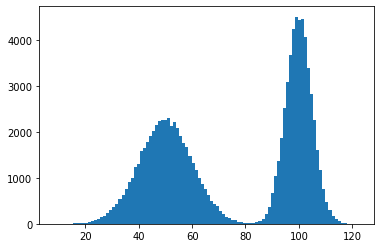

In [3]:
%%time
vals = plt.hist(X, bins=100)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


<BarContainer object of 100 artists>

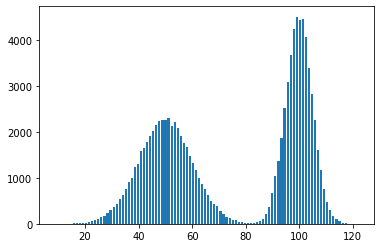

In [4]:
def Hist(X, bins=100):
    a, b = X.min(), X.max()
    n = len(X)
    delta = (b - a)/bins
    centers = []
    values = []
    lookup = defaultdict(int)
    for (i,j,k) in [(a+l*delta, a+(l+1/2)*delta,  a+(l+1)*delta) for l in range(bins)]:
        centers.append(j)
        values.append(len(X[(X >= i) & (X <= k)]))
        lookup[centers[-1]] = values[-1]
    return centers, values, lookup

%time
P = Hist(X, bins=100)
plt.bar(P[0], P[1])

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


<BarContainer object of 96 artists>

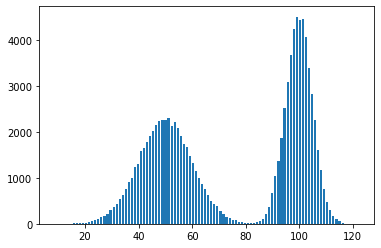

In [5]:
def Hist(X, bins=100):
    a, b = X.min(), X.max()
    delta = (b - a)/bins
    bin_values = defaultdict(int)
    ranges = [(a+i*delta, a+(i+1/2)*delta, a+(i+1)*delta) for i in range(bins)] 
    idx = 0
    for i in sorted(X):
        if ranges[idx][0] <= i <= ranges[idx][2]:
            bin_values[ranges[idx][1]] += 1
        else:
            idx += 1
    return list(bin_values.keys()), list(bin_values.values()), bin_values
    
%time
P = Hist(X, bins=100)
plt.bar(P[0], P[1])

In [6]:
class Hist:
    def __init__(self, X, bins=100):
        self._check(X)
        self.bins = 100
        self.size = len(X)
        self.centers, self.values, self.lookup = self._fit(X, bins=self.bins)
        self.cumulative = np.cumsum(self.values/self.size)
    
    def sample(self, size=1):
        indices = [np.searchsorted(self.cumulative, np.random.uniform())\
                   for i in range(size)]
        return self.centers[indices]
          
    def _check(self, X):
        assert(len(X.shape) == 1), "only supported for 1-d data"

    def _fit(self, X, bins):
        a, b = X.min(), X.max()
        n = len(X)
        delta = (b - a)/bins
        centers = []
        values = []
        lookup = defaultdict(int)
        for (i,j,k) in [(a+l*delta, a+(l+1/2)*delta,  a+(l+1)*delta) for l in range(bins)]:
            centers.append(j)
            values.append(len(X[(X >= i) & (X <= k)]))
            lookup[centers[-1]] = values[-1]/self.size
        return np.array(centers), np.array(values), lookup
    
    def _fit2(self, X, bins):
        a, b = X.min(), X.max()
        delta = (b - a)/bins
        bin_values = defaultdict(int)
        ranges = [(a+i*delta, a+(i+1/2)*delta, a+(i+1)*delta) for i in range(bins)] 
        idx = 0
        for i in sorted(X):
            if ranges[idx][0] <= i <= ranges[idx][2]:
                bin_values[ranges[idx][1]] += 1
            else:
                idx += 1
        return np.array(bin_values.keys()), np.array(bin_values.values()/len(X)), bin_values
            

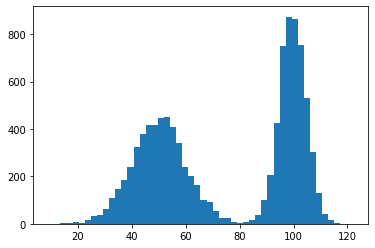

In [7]:
h = Hist(X, bins=100)
s = h.sample(size=10000)
plt.hist(s,bins=50);